In [1]:
%matplotlib inline
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import re

from root_numpy import root2array

In [2]:
filedir = '/Users/davidkaleko/larlite/UserDev/KalekoAna/TrackStudy/mac/stitched_polished_output/'
!ls $filedir

TrackDataMCComp_BNBDATA_kalekostitched.root       TrackDataMCComp_BNBEXTDATA_pandoraNuPMA.root
TrackDataMCComp_BNBDATA_pandoraNuPMA.root         TrackDataMCComp_mcc7bnbcosmic_kalekostitched.root
TrackDataMCComp_BNBEXTDATA_kalekostitched.root    TrackDataMCComp_mcc7bnbcosmic_pandoraNuPMA.root


In [3]:
types = ['kalekostitched','pandoraNuPMA']
df_dict = {}
for mytype in types:
    mcnu =    'TrackDataMCComp_mcc7bnbcosmic_%s.root' % mytype
    #mcbkg =   'TrackDataMCComp_INTIMECOSMICS_20602evts_out.root'
    datanu =  'TrackDataMCComp_BNBDATA_%s.root' % mytype
    databkg = 'TrackDataMCComp_BNBEXTDATA_%s.root' % mytype
    
    files = { 'mcnu' : filedir + mcnu, 
              #'mcbkg' : filedir + mcbkg,
             'datanu' : filedir + datanu, 
             'databkg' : filedir + databkg }
    
    n_evts_analyzed = {'mcnu' : 20000, 'datanu' : 16101 , 'databkg' : 5774 }
    #{ 'databkg' : 379637, 'datanu' : 545906, 'mcnu' : 173400 }#'mcbkg' : 20602,
    df_dict[mytype] = {}
        
    for sample, filepath in files.iteritems():
        df_dict[mytype][sample] = pd.DataFrame( root2array ( filepath, 'trk_tree' ) )

In [4]:
print df_dict.keys()
print df_dict['pandoraNuPMA'].keys()

['pandoraNuPMA', 'kalekostitched']
['datanu', 'mcnu', 'databkg']


In [5]:
pot_per_sample = {'datanu': (float(n_evts_analyzed['datanu']) / 545906) * 4.88e+19, 
                  'databkg': (float(n_evts_analyzed['databkg']) / 379637) * 5.922589105698338e+19, 
                  #'mcbkg': (float(n_evts_analyzed['mcbkg']) / 20602) *9.56562114062697e+18, 
                  'mcnu': (float(n_evts_analyzed['mcnu']) / 173400) *2.099007e+20}

In [6]:
print n_evts_analyzed
print pot_per_sample

{'datanu': 16101, 'databkg': 5774, 'mcnu': 20000}
{'datanu': 1.4393115298238157e+18, 'mcnu': 2.421e+19, 'databkg': 9.007823130069568e+17}


In [7]:
print df_dict.keys()

['pandoraNuPMA', 'kalekostitched']


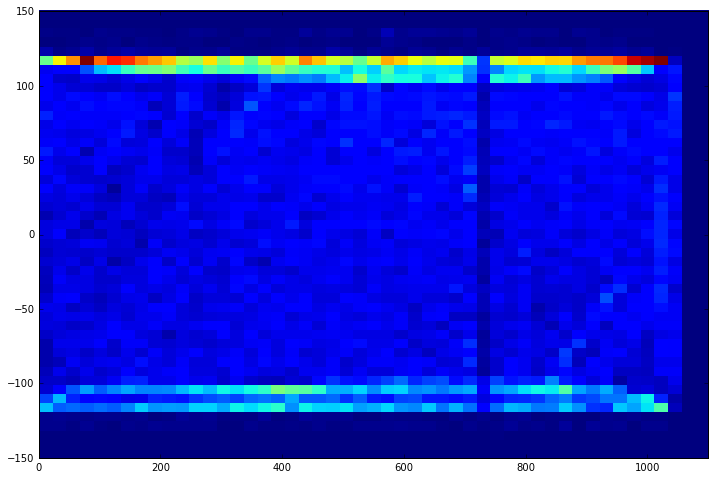

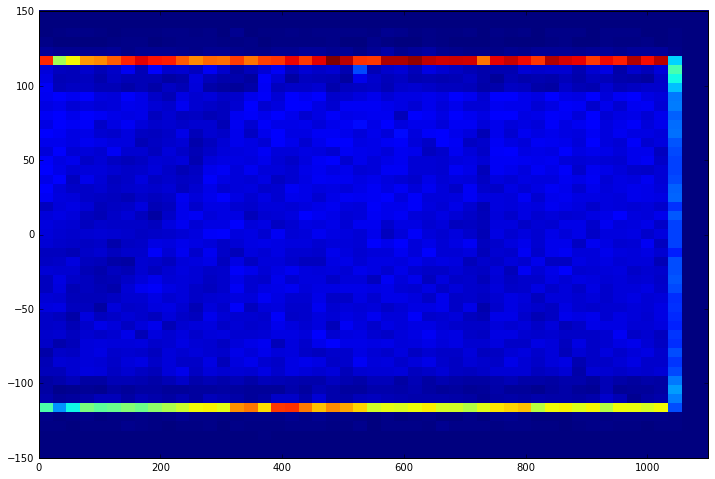

In [9]:
zmin, zmax = 0.,1100.
ymin, ymax = -150, 150

zbins = np.linspace(zmin, zmax, 50)
ybins = np.linspace(ymin, ymax, 50)

plt.figure(figsize=(12,8))
dataz = df_dict['pandoraNuPMA']['datanu']['trk_end_z'].values
datay = df_dict['pandoraNuPMA']['datanu']['trk_end_y'].values
dummy = plt.hist2d(x=dataz,y=datay,normed=True,bins=[zbins,ybins])
datahist = dummy[0]

plt.figure(figsize=(12,8))
mcz = df_dict['pandoraNuPMA']['mcnu']['trk_end_z'].values
mcy = df_dict['pandoraNuPMA']['mcnu']['trk_end_y'].values
dummy = plt.hist2d(x=mcz,y=mcy,normed=True,bins=[zbins,ybins])
mchist = dummy[0]

data_over_mc = datahist/mchist
mc_over_data = mchist/datahist

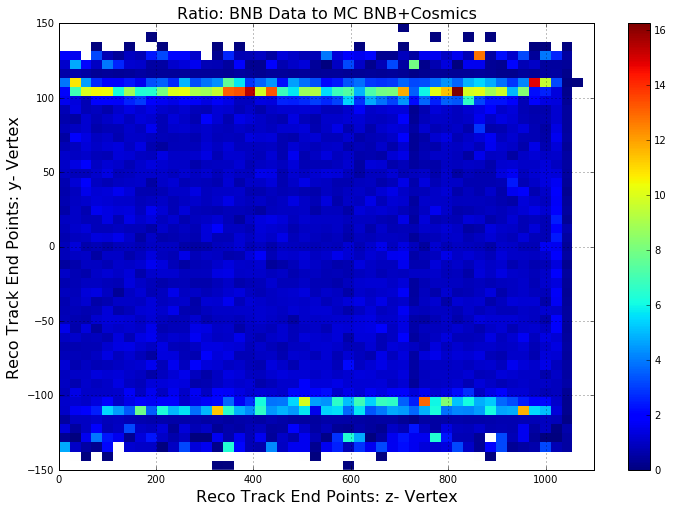

In [10]:
plt.figure(figsize=(12,8))
plt.imshow(data_over_mc.T,extent=(zmin,zmax,ymin,ymax),interpolation='none',aspect='auto')
#plt.figure(figsize=(12,8))
#plt.imshow(mc_over_data,extent=(zmin,zmax,ymin,ymax),interpolation='none',aspect='auto')
plt.title('Ratio: BNB Data to MC BNB+Cosmics',fontsize=16)
plt.grid(True)
plt.ylabel('Reco Track End Points: y- Vertex',fontsize=16)
plt.xlabel('Reco Track End Points: z- Vertex',fontsize=16)
plt.colorbar()

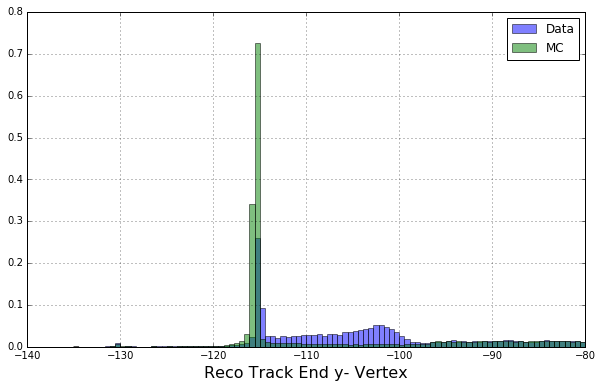

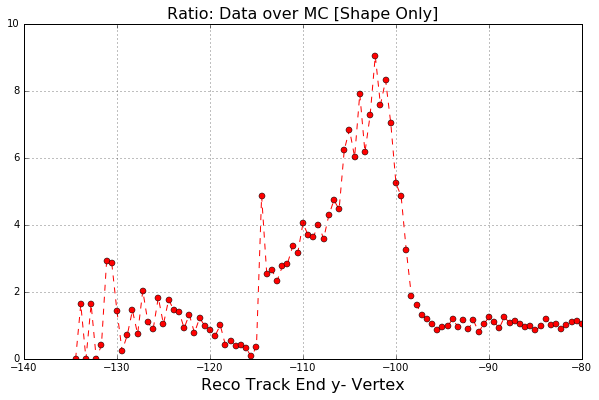

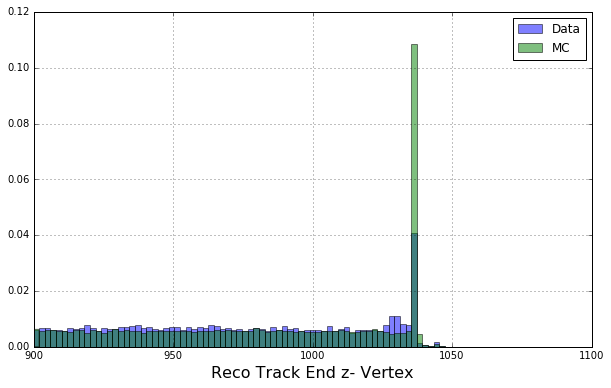

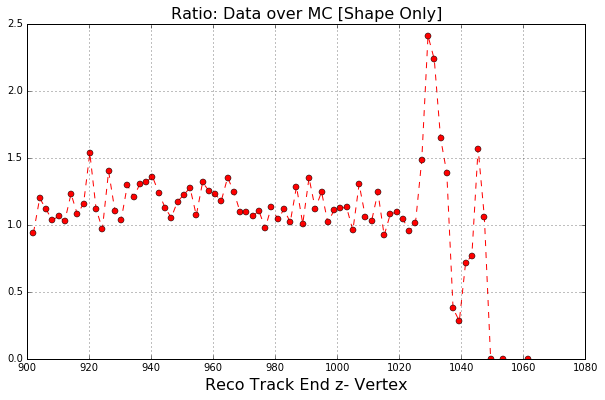

In [11]:
coords = { #'x' : np.linspace(0,50,100), 
           'y' : np.linspace(-135,-80,100),
           'z' : np.linspace(900,1100,100) }

for coord, bins in coords.iteritems():
    plt.figure(figsize=(10,6))
    mybins = bins
    mydata = df_dict['pandoraNuPMA']['datanu']['trk_end_%s'%coord].values
    mymc = df_dict['pandoraNuPMA']['mcnu']['trk_end_%s'%coord].values
    data_1dhist = plt.hist(mydata,normed=True,bins=mybins,label='Data',alpha=0.5)
    mc_1dhist = plt.hist(mymc,normed=True,bins=mybins,label='MC',alpha=0.5)
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlabel('Reco Track End %s- Vertex'%coord,fontsize=16)
    
    plt.figure(figsize=(10,6))
    data_over_mc_1d = data_1dhist[0]/mc_1dhist[0]
    myx = [mybins[i] + (mybins[i+1] - mybins[i]) for i in xrange(len(mybins)-1)]
    plt.plot(myx,data_over_mc_1d,'ro--')
    plt.grid(True)
    plt.title('Ratio: Data over MC [Shape Only]',fontsize=16)
    plt.xlabel('Reco Track End %s- Vertex'%coord,fontsize=16)

In [12]:
print "Data min z value is",np.min(df_dict['pandoraNuPMA']['datanu']['trk_end_z'].values)
print "Data max z value is",np.max(df_dict['pandoraNuPMA']['datanu']['trk_end_z'].values)
print "MC min z value is",np.min(df_dict['pandoraNuPMA']['mcnu']['trk_end_z'].values)
print "MC max z value is",np.max(df_dict['pandoraNuPMA']['mcnu']['trk_end_z'].values)

Data min z value is -3.72977427426
Data max z value is 1076.69399889
MC min z value is -7.10922693179
MC max z value is 1061.55341525


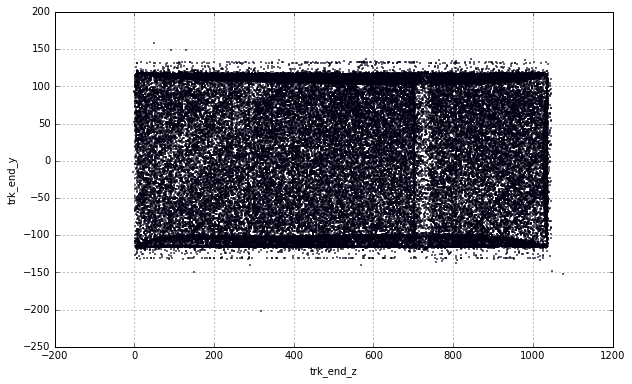

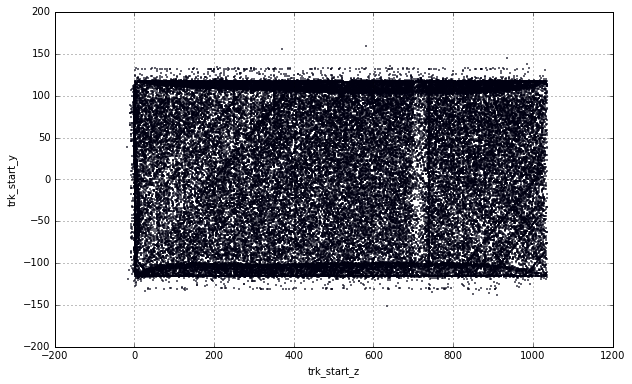

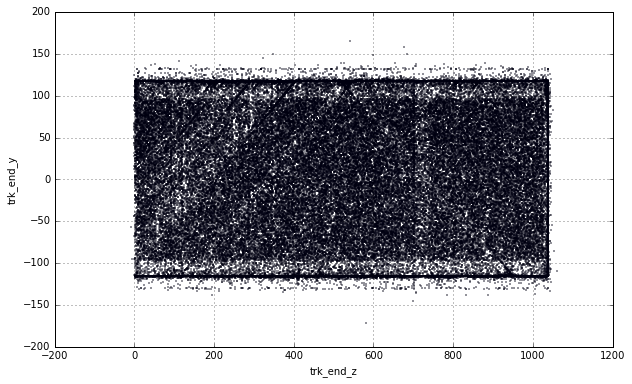

In [13]:
df_dict['pandoraNuPMA']['datanu'].plot(x='trk_end_z',y='trk_end_y',
                       figsize=(10,6),
                       kind='scatter',
                       s=0.5)
df_dict['pandoraNuPMA']['datanu'].plot(x='trk_start_z',y='trk_start_y',
                       figsize=(10,6),
                       kind='scatter',
                       s=0.5)
df_dict['pandoraNuPMA']['mcnu'].plot(x='trk_end_z',y='trk_end_y',
                       figsize=(10,6),
                       kind='scatter',
                       s=0.25)

In [14]:
def plotVariableComparisonBkg(myvar, mybins, myquery, mytitle, myshapeonly = False, myylims = None,\
                           myxlabel = 'test', myylabel = 'test'):

    plt.figure(figsize=(10,6))
    poop = plt.grid(True)
    plt.title(mytitle,fontsize=16)
  
    mydict_intime = df_dict['mcbkg']
    if myquery: mydict_intime = df_dict['mcbkg'].query(myquery)
    myweight_intime = (5.e19) / pot_per_sample['mcbkg']
    myvals_intime = mydict_intime[myvar].values
    nphist = np.histogram(myvals_intime,bins=mybins,
                          weights=[myweight_intime]*len(myvals_intime),
                          normed=myshapeonly)
    integral_intime = np.sum(nphist[0])
    
    poop = plt.hist(myvals_intime,bins=mybins,
                    label='MC: Cosmic Bkg. from In Time Cosmic Entries = %0.2f' % integral_intime,
                    alpha=0.5,
                    weights=[myweight_intime]*len(myvals_intime),
                    color='cyan',
                    stacked=False,
                    rwidth=1.)

    myextvals = df_dict['databkg'][myvar].values
    if myquery: myextvals = df_dict['databkg'].query(myquery)[myvar].values
    myextweight = (5.e19) / pot_per_sample['databkg']
    extintegral = 0.
    if len(myextvals):
        blah = plt.hist(myextvals,bins=mybins,color='g',
                        alpha=0,weights=[myextweight]*len(myextvals),normed=myshapeonly)
    
        yextvals = blah[0]
        xextvals = [blah[1][i]+(blah[1][i+1]-blah[1][i])/2. for i in xrange(len(blah[1][:-1]))]
        yerrs = np.sqrt(np.array(yextvals)*myextweight)
        extintegral = np.sum(blah[0])
        awefia = plt.errorbar(xextvals,yextvals,fmt='ro', yerr=yerrs,
                          label='BNB EXT DATA: Entries = %0.2f' % extintegral
                         )

    plt.ylim((0, plt.ylim()[1]))
    if myylims is not None:
        plt.ylim(myylims)
    leg = plt.legend()
    plt.xlabel(myxlabel,fontsize=16)
    plt.ylabel(myylabel,fontsize=16)
    dummy = leg.get_frame().set_alpha(0.5)

In [15]:
#myvar = 'trk_len'
#mybins = np.linspace(0,1000,20)
#mytitle = 'Length of All Tracks (>3cm) In Event [Xiao Selected Events]'
#myshapeonly = False
#myquery = ''
#myxlabel = 'Reco Track Length [cm]'
#myylabel = 'Events (5e19 POT Normalized)'
#myylims = (0,2000)
#plotVariableComparisonBkg(myvar,mybins,myquery,mytitle,myshapeonly,myylims,myxlabel,myylabel)

In [16]:
def plotVariableComparison(myvar, mybins, myquery, mytitle, myshapeonly = False, myylims = None,\
                           myxlabel = 'test', myylabel = 'test',myproducer='pandoraNuPMA'):

    plt.figure(figsize=(10,6))
    poop = plt.grid(True)
    plt.title(mytitle,fontsize=16)
    #plt.ylabel('Events: 5e19 POT Normalized',fontsize=16)
    
    mydict = df_dict[myproducer]['mcnu']
    if myquery: mydict = df_dict[myproducer]['mcnu'].query(myquery)
    #myvals = mydict[myvar].values
    myweight = (5.e19) / pot_per_sample['mcnu']
    if myshapeonly: myweight = 1.
        
    myvals = mydict[myvar].values
    
    #integral = float(len(myvals))*myweight
    nphist = np.histogram(myvals,bins=mybins,
                          weights=[myweight]*len(myvals),
                          normed=myshapeonly)
    integral = np.sum(nphist[0])  
    
    poop = plt.hist(myvals,bins=mybins,
                    label='MC: BNB+Cosmic (Signal+Background): Entries = %0.2f' % integral,
                    alpha=0.5,
                    weights= [myweight]*len(myvals),
                    normed=myshapeonly,
                   color='b',
                    stacked=False,
                   rwidth=1.)

    mybnbdict = df_dict[myproducer]['datanu']    
    if myquery: mybnbdict = df_dict[myproducer]['datanu'].query(myquery)
    mybnbvals = mybnbdict[myvar].values
    mybnbweight = (5.e19) / pot_per_sample['datanu']
    #if myshapeonly: mybnbweight = 1.
    
    blah = plt.hist(mybnbvals,bins=mybins,color='g',
                    alpha=0,weights=[mybnbweight]*len(mybnbvals),normed=myshapeonly)
    
    ybnbvals = blah[0]
    xbnbvals = [blah[1][i]+(blah[1][i+1]-blah[1][i])/2. for i in xrange(len(blah[1][:-1]))]
    bnbintegral = np.sum(blah[0])
    #awefia = plt.plot(xbnbvals,ybnbvals,'bo',
    #                  label='BNB DATA: Entries = %0.2f' % bnbintegral
    #                 )

    myextvals = df_dict[myproducer]['databkg'][myvar].values
    if myquery: myextvals = df_dict[myproducer]['databkg'].query(myquery)[myvar].values
    myextweight = (5.e19) / pot_per_sample['databkg']
    #if myshapeonly: myextweight = 1.
    extintegral = 0.
    if len(myextvals):
        blah = plt.hist(myextvals,bins=mybins,color='g',
                        alpha=0,weights=[myextweight]*len(myextvals),normed=myshapeonly)
    
        yextvals = blah[0]
        xextvals = [blah[1][i]+(blah[1][i+1]-blah[1][i])/2. for i in xrange(len(blah[1][:-1]))]
        yerrs = np.sqrt(np.array(yextvals)*myextweight)
        #extintegral = float(len(myextvals))*myextweight
        extintegral = np.sum(blah[0])
        #awefia = plt.errorbar(xextvals,yextvals,fmt='ro', yerr=yerrs,
        #                  label='BNB EXT DATA: Entries = %0.2f' % extintegral
        #                 )

        diffintegral = bnbintegral-extintegral
        yerrs = np.sqrt(np.array(ybnbvals)*mybnbweight + np.array(yextvals)*myextweight)
        #if yerrs is zero, set equal to 1 event
        yerrs = [x if x else 1 for x in yerrs]
        #awefia = plt.errorbar(xextvals,ybnbvals-yextvals,fmt='mo',yerr = yerrs,
        #                  label='BNB DATA - BNB EXT DATA (%0.2f)' % diffintegral
        #                 )
        awefia = plt.errorbar(xextvals,ybnbvals,fmt='mo',yerr = 0,
                          label='BNB DATA (%0.2f)' % diffintegral
                         )
    else:
        print "warning: len (myextvals) is zero"
        diffintegral = bnbintegral
        yerrs = np.sqrt(np.array(ybnbvals)*mybnbweight)
        #if yerrs is zero, set equal to 1 event
        yerrs = [x if x else 1 for x in yerrs]
        awefia = plt.errorbar(xbnbvals,ybnbvals,fmt='mo',yerr = yerrs,
                          label='BNB DATA - BNB EXT DATA (%0.2f)' % diffintegral
                         )
    plt.ylim((0, plt.ylim()[1]))
    if myylims is not None:
        plt.ylim(myylims)
    leg = plt.legend()
    plt.xlabel(myxlabel,fontsize=16)
    plt.ylabel(myylabel,fontsize=16)
    leg.get_frame().set_alpha(0.5)

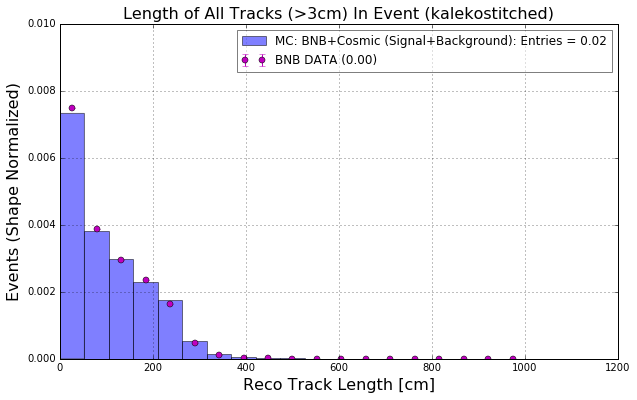

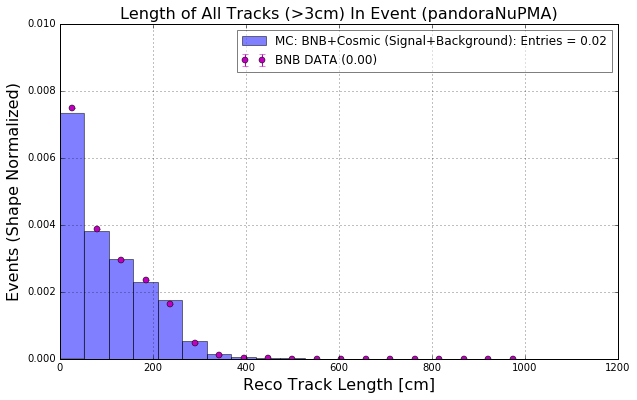

In [26]:
for mytype in types:
    myvar = 'trk_len'
    mybins = np.linspace(0,1000,20)
    mytitle = 'Length of All Tracks (>3cm) In Event (%s)'%mytype
    myshapeonly = True
    myquery = ''
    myxlabel = 'Reco Track Length [cm]'
    myylabel = 'Events (Shape Normalized)'
    myylims = (0.0000000001,0.01)
    myproducer = mytype
    plotVariableComparison(myvar,mybins,myquery,mytitle,myshapeonly,myylims,myxlabel,myylabel)
    #plt.yscale('log')

i should be using "length of track inside of fiducial volume"!!

In [20]:
df_dict['pandoraNuPMA']['datanu'].columns.values

array(['trk_len', 'trk_start_x', 'trk_start_y', 'trk_start_z', 'trk_end_x',
       'trk_end_y', 'trk_end_z'], dtype=object)

In [21]:
containedquery = 'trk_start_x > 20. and trk_end_x < ((128.175*2)-20.)'
containedquery += ' and '
containedquery = 'trk_start_y > (-116.5+26.5) and trk_end_y < (116.5-26.5)'
containedquery += ' and '
containedquery = 'trk_start_z > 20. and trk_end_z < (1036.8-36.8)'

In [38]:
print df_dict['kalekostitched']['mcnu'].head()
print df_dict['pandoraNuPMA']['mcnu'].head()

      trk_len  trk_start_x  trk_start_y  trk_start_z   trk_end_x   trk_end_y  \
0  237.360261    87.699748  -107.777600   775.238856   12.659920  117.298203   
1  258.256670    78.727410   117.681106   933.349566  214.647351  -85.310081   
2  171.064955    72.965115     4.478223   621.229656  194.048530 -115.620040   
3   75.328479    66.026553   117.338120   610.044504  128.108251   77.095221   
4   60.899686    53.557169   -75.858132   471.270229    7.865577 -115.200299   

     trk_end_z  
0   782.295810  
1  1017.116236  
2   634.587521  
3   624.213188  
4   479.828504  
      trk_len  trk_start_x  trk_start_y  trk_start_z   trk_end_x   trk_end_y  \
0  253.322901    37.524926  -115.594215   747.147259  160.693571   50.564563   
1  129.018161   182.895564     2.258519   890.592000  141.252318  117.568522   
2  136.262158    89.541953  -115.450203   217.538777  164.611681  -16.550453   
3  136.351639   141.108193    93.900592     0.054161  217.877657  -10.611401   
4   61.230354   1

 # stitched tracks is 131883
# base tracks is 131883


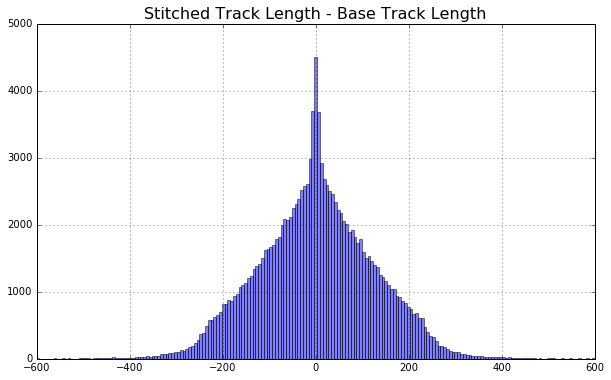

In [35]:
plt.figure(figsize=(10,6))
stitch = df_dict['kalekostitched']['mcnu']['trk_len'].values
print "# stitched tracks is",len(stitch)
base = df_dict['pandoraNuPMA']['mcnu']['trk_len'].values
print "# base tracks is",len(base)
plt.hist(stitch-base,bins=np.linspace(-600,600,200),alpha=0.5)
plt.grid(True)
plt.title('Stitched Track Length - Base Track Length',fontsize=16)
#plt.yscale('log')
plt.legend()

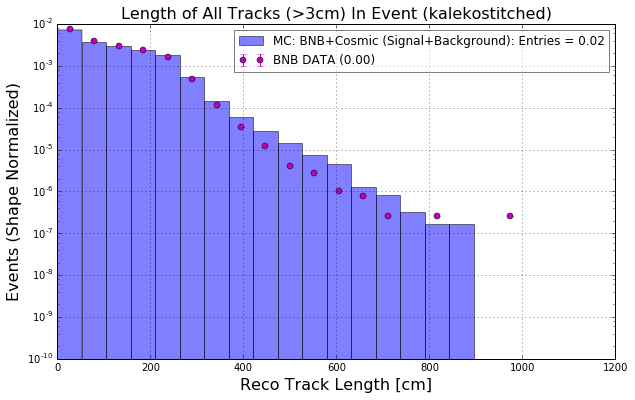

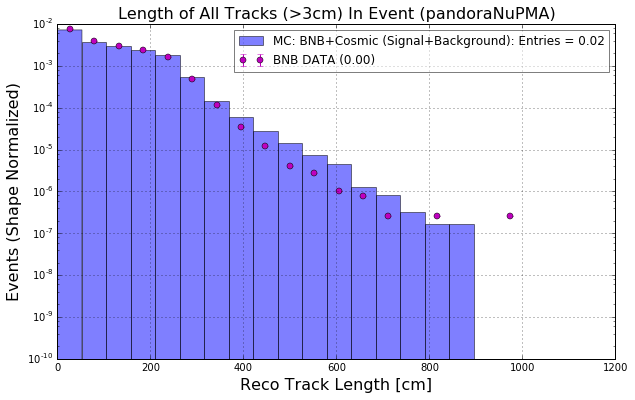

In [22]:
for mytype in types:
    myvar = 'trk_len'
    mybins = np.linspace(0,1000,20)
    mytitle = 'Length of All Tracks (>3cm) In Event (%s)'%mytype
    myshapeonly = True
    myquery = containedquery
    myxlabel = 'Reco Track Length [cm]'
    myylabel = 'Events (Shape Normalized)'
    myylims = (0.0000000001,0.01)
    myproducer = mytype
    plotVariableComparison(myvar,mybins,myquery,mytitle,myshapeonly,myylims,myxlabel,myylabel)
    plt.yscale('log')

(onbeam - offbeam)                               vs mcc7bnbcosmic
overall, (onbeam - offbeam) has too many short tracks
just offbeam has too few short tracks
that means onbeam has way too many short tracks

let's say onbeam is 50 short tracks, offbeam has 30 short tracks.
expect 40 short tracks in offbeam from mc
onbeam minus offbeam is 20 short tracks, bnbcosmic has 15 short tracks

RUN ON IN TIME COSMICS
for events Xiao filter selects, histogram: all track lengths, all mctrack lengths
since # tracks and # mctracks don't equal, maybe compare shape
    -- this doesn't work because pandora removes its cosmic tracks automatically